# Van der Walls' Equation Plotter

This notebook has been created to plot Van der Waals' Eqaution of state.
The Van der Waal equation is an extension of the Ideal Gas Equation that has been modified to account for the interactions between molecules of a gas and the size of the molecules. It can be written in the form: 
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/50da03f6af49f00a43c1c6a09b56720ca7b965c9) <br>
If we consider the number of moles used, the formula above becomes:
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/24899dc0e9b8cae3c359464d400b279420028451)<br>


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 

To see the effects of the Van der Waals' equation we must compare it to the Ideal Gas Equation. The Ideal Gas Equation states that if the temperature of a gas in a closed system is kept constant, the pressure and volume of the gas are inversely proportional, so as one increases the other decreases. We can see this visually by plotting a graph of pressure vs volume for the Ideal Gas Equation:
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/934032db2ac1f12624f85a90eeba651dcf4af377)

We will assume the number of moles is 1. By plotting graphs with an increasing temperature, we can see how changes in temperature affect an ideal gas.

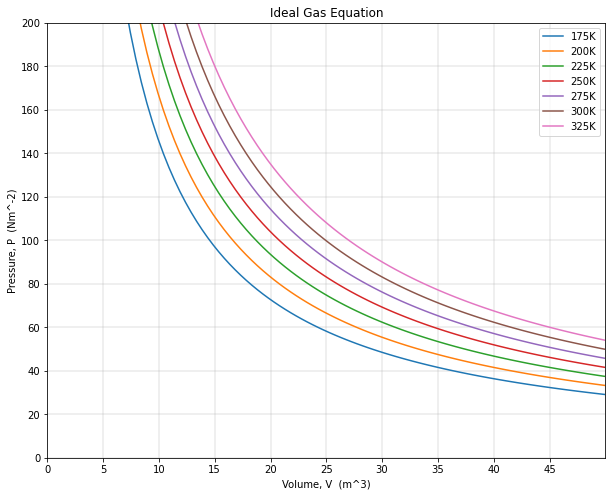

In [2]:
V = np.linspace(1, 50, 100)
R = 8.31446261815324
t = 0

plt.figure(figsize=(10, 8))

for t in range(175, 350, 25):
    plt.plot(V, (R*t/V), label = str(t) + 'K')
    

plt.xlabel('Volume, V  (m^3)')
plt.ylabel('Pressure, P  (Nm^-2)')
plt.title('Ideal Gas Equation')
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50, step=5))
plt.ylim(10, 200)
plt.yticks(np.arange(0, 210, step=20))
plt.grid(True, linewidth=0.4)
plt.legend();

Now if we produce a graph for increasing temperatures of Van der Waals' equation, we can see a quite drastic difference. For this graph we will use carbon dioxide as an example, we didn't need to specify the gas for the ideal gas equation because it treats all gases identically. However, this isn't the case for the Van der Waals' Equation as we need to specify the `a` and `b` values we will use. Once again, we will assume 1 mole of gas is used.

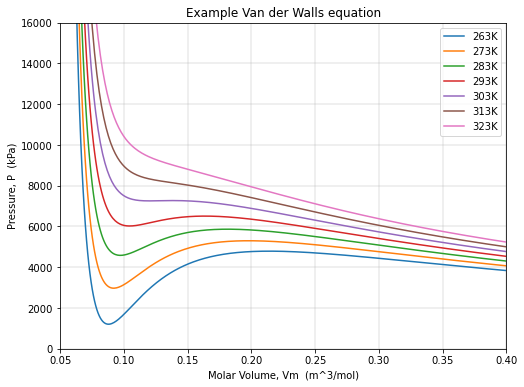

In [3]:
V_m = np.linspace(0.05, 0.5, 500)
a = 3.658 * 100
b = 0.04286

plt.figure(figsize=(8, 6))

for t in range(263, 333, 10):
    plt.plot(V_m, ((R*t)/(V_m - b) - (a/V_m**2)), label= str(t) + 'K')
    
plt.xlabel('Molar Volume, Vm  (m^3/mol)')
plt.ylabel('Pressure, P  (kPa)')
plt.title('Example Van der Walls equation')
plt.xlim(0.05, 0.4)
plt.xticks(np.arange(0.05, 0.45, step=0.05))
plt.ylim(0, 16000)
plt.yticks(np.arange(0, 18000, step=2000))
plt.grid(True, linewidth=0.4)
plt.legend();

To find the critical point of the molecule we need to find its stationary points. With the critical point we can set a suitable set of axis, since each gas will require a different set of axis and it would take a long time to adjust the axis every time. With a bit of manipulation we can express the critical Volume, Pressure and Temperature of a gas in terms of `a` and `b`.

In [4]:
a = 365.8
b = 0.04286

V_c = 3*b
P_c = a/(27*(b**2))
T_c = ((8*a)/(27*b*R))

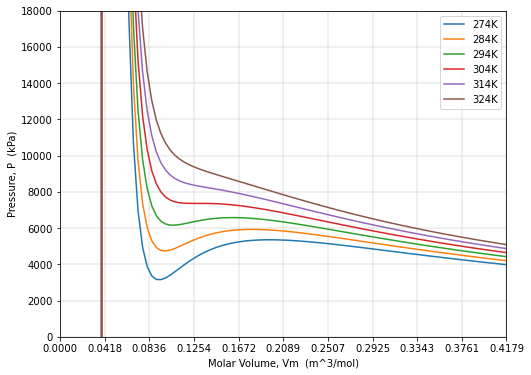

In [5]:
V_m = np.linspace(V_c/1000, V_c*3.3, 100)

plt.figure(figsize=(8, 6))

for t in range(int(T_c - 30), int(T_c + 30), 10):
    plt.plot(V_m, ((R*t)/(V_m - b) - (a/V_m**2)), label= str(t) + 'K')

plt.xlabel('Molar Volume, Vm  (m^3/mol)')
plt.ylabel('Pressure, P  (kPa)')
plt.xlim(0, V_c*3)
plt.xticks(np.arange(0, (V_c*3 + (V_c*3)/10), step=(V_c*3.25)/10))
plt.ylim(0 , P_c+10000)
plt.yticks(np.arange(0, P_c+12000, step=2000))
plt.grid(True, linewidth=0.4)
plt.legend();

Now, we'll just rewrite this as a function and touch it up a little bit. After this we should be able to produce a graph of pressure against volume for any gas, given its constants, `a` and `b`.

In [6]:
def VdWplotter(a_kp, b, range_ud=3, temp_step=10):
    V_c = 3*b
    P_c = a_kp/(27*(b**2))
    T_c = ((8*a_kp)/(27*b*R))
    
    V_m = np.linspace(-2*(V_c), V_c*3, 200)

    plt.figure(figsize=(9, 6))

    for t in range(int(T_c - range_ud*temp_step), int(T_c + range_ud*temp_step), temp_step):
        plt.plot(V_m, ((R*t)/(V_m - b) - (a_kp/V_m**2)), label= str(t) + 'K')

    plt.xlabel('Molar Volume, Vm  (m^3/mol)')
    plt.ylabel('Pressure, P  (kPa)')
    plt.title("Van der Waals' equation (pressure/volume)")
    plt.xlim(0, V_c*3)
    plt.xticks(np.arange(0, V_c*3, step=round((V_c*3)/10, 3)))
    plt.ylim(0 , P_c+10000)
    plt.yticks(np.arange(0, P_c+12000, step=2000))
    plt.grid(True, linewidth=0.4)
    plt.legend();
    print('Critical Pressure: ' + str(round(P_c, 1)) + ' kPa')
    print('Critical Temperature: ' + str(round(T_c, 1)) + ' K')
    print('\n')
    return

Let's test this out using fluorine, its constant values are: a = 117.1 (kPa L^2/mol^2) and b = 0.02896 (L/mol), these values have been take from: <br> [https://chem.libretexts.org/Ancillary_Materials/Reference/Reference_Tables/Atomic_and_Molecular_Properties/A8%3A_van_der_Waal's_Constants_for_Real_Gases]

Critical Pressure: 5171.3 kPa
Critical Temperature: 144.1 K




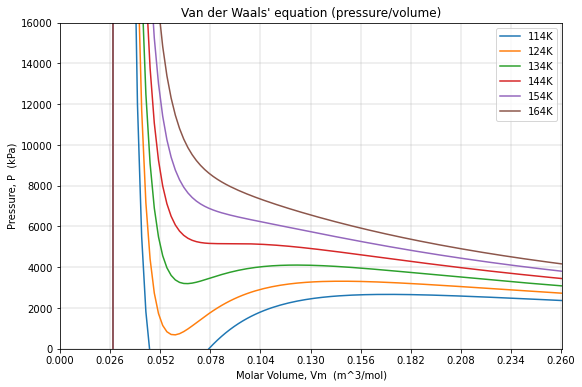

In [7]:
VdWplotter(117.1, 0.02896)

We have successfully created a function that plots Van der Waals' equation on an axis of Pressure vs Molar Volume. Van der Waals' equation is also plotted on a graph of Pressure vs Density. To do this we need to modify the equation's form so that Molar Volume is replaced with Density (mol/L). For this example, we'll go back to using carbon dioxide.

In [8]:
def VdW_pvdplot(a_kp, b, range_ud=3, temp_step=10, legend_toggle=True):
    rho_c = 1/(3*b)
    P_c = a_kp/(27*(b**2))
    T_c = ((8*a_kp)/(27*b*R))
    
    rho_in = np.linspace(1, 4*rho_c, 200)

    plt.figure(figsize=(9, 6))

    for t in range(int(T_c - range_ud*temp_step), int(T_c + (range_ud+1)*temp_step), temp_step):
        if t > 0:
            plt.plot(rho_in, ((R*t)/(1/rho_in - b) - (a_kp/(1/rho_in)**2)), label= str(t) + 'K')
            

    plt.xlabel('Density, ρ  (mol/L)')
    plt.ylabel('Pressure, P  (kPa)')
    plt.title("Van der Waals' equation (pressure/density)")
    plt.xlim(1, rho_c*3)
    plt.xticks(np.arange(1, rho_c*3.3, step=round((rho_c*3)/10, 3)))
    plt.ylim(0 , P_c+8000)
    plt.yticks(np.arange(0, P_c+10000, step=2000))
    plt.grid(True, linewidth=0.4)
    if legend_toggle:
        plt.legend();
    print('Critical Pressure: ' + str(round(P_c, 1)) + ' kPa')
    print('Critical Temperature: ' + str(round(T_c, 1)) + ' K')
    print('\n')
    return

Critical Pressure: 7375.2 kPa
Critical Temperature: 304.1 K




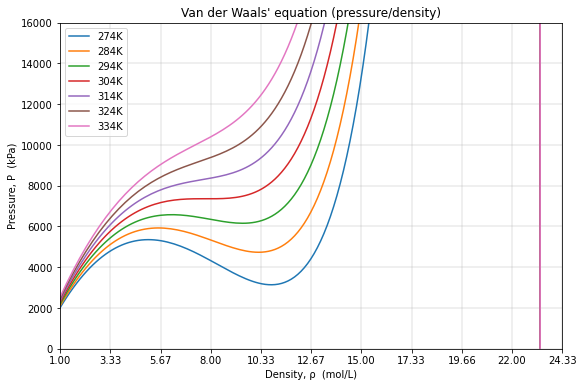

In [9]:
VdW_pvdplot(365.8, 0.04286, 3, 10)

If we rewrite the above function for a graph of pressure vs temperature, this is the graph (and function) you get:

In [10]:
def VdW_pvtplot(a_kp, b, range_ud=3, rho_step=1, legend_toggle=True):
    rho_c = 1/(3*b)
    P_c = a_kp/(27*(b**2))
    T_c = ((8*a_kp)/(27*b*R))
    
    temp_in = np.linspace(1, 1.5*T_c, 200)

    plt.figure(figsize=(9, 6))

    for rho in np.arange(round(rho_c - range_ud*rho_step, 1), round(rho_c + (range_ud+1)*rho_step, 1), rho_step):
        if rho > 0:
            plt.plot(temp_in, ((R*temp_in)/(1/rho - b) - (a_kp/(1/rho)**2)), label= str(rho) + ' mol/L')
            

    plt.xlabel('Temperature, T  (K)')
    plt.ylabel('Pressure, P  (kPa)')
    plt.title("Van der Waals' equation (pressure/temperature)")
    plt.xlim((1/2)*T_c, T_c*1.5)
    plt.xticks(np.arange((1/2)*T_c, T_c*1.65, step=round(((T_c*1.5)-((1/2)*T_c))/10, 3)))
    plt.ylim(0 , P_c+3000)
    plt.yticks(np.arange(0, P_c+4000, step=1000))
    plt.grid(True, linewidth=0.4)
    if legend_toggle:
        plt.legend();
    print('Critical Pressure: ' + str(round(P_c, 1)) + ' kPa')
    print('Critical Temperature: ' + str(round(T_c, 1)) + ' K')
    print('\n')
    return

Critical Pressure: 7375.2 kPa
Critical Temperature: 304.1 K




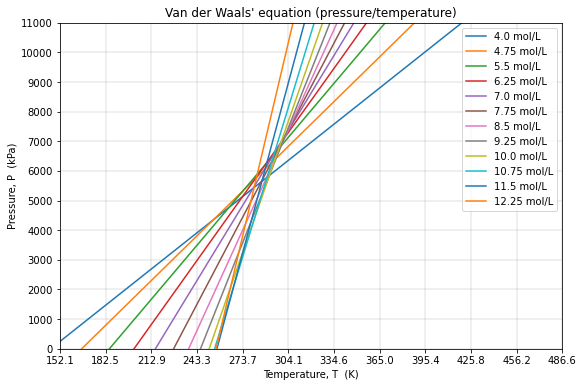

In [11]:
VdW_pvtplot(365.8, 0.04286, 5, 0.75)

Now, all that's left is to plot the Van der Waals' equation for temperature vs density. After this is done, all three components of the Van der Waals' surface will be ready.

Below, I've defined a function `VdW_tvdplot` that takes up to 6 arguments, the first two depend on the gas that we want to model, `a_kp` is the 'a' constant of the gas, in kilopascals, and `b` is the 'b' constant. The `range_ud` and `pres_step` let us control how many plots we want on our graph. The `range_ud` input tells our function how many plots we want above and below our critical point plot, and `pres_step` controls the increase in pressure for each plot. The `y_range` input will set the y-axis scale by a multiple of the critical temperature. And finally, the `crit_values` and `legend_toggle` inputs take a value of either `True` or `False`, when true it lets us see the exact critical point plot or the legend (key), when false it rounds to the nearest thousand kilopascals or there is no key.

Here is the function and an example of the plot of the gas carbon dioxide:

In [12]:
def VdW_tvdplot(a_kp, b, range_ud=4, pres_step=750, y_range=2, crit_value=False, legend_toggle=True):
    rho_c = 1/(3*b)
    P_c = a_kp/(27*(b**2))
    T_c = ((8*a_kp)/(27*b*R))
    
    rho_in = np.linspace(0.05, 4*rho_c, 200)

    plt.figure(figsize=(9, 6))
    
    if crit_value:
        for p in range(int(P_c - range_ud*pres_step), int(P_c + (range_ud+1)*pres_step), pres_step):
            if p > 0:
                plt.plot(rho_in, (((p+a_kp/((1/rho_in)**2))*((1/rho_in)-b))/R), label= str(p) + 'kPa')
                
        
    else:
        
        for p in range(round(int(P_c - range_ud*pres_step), -3), round(int(P_c + (range_ud+1)*pres_step), -3), pres_step):
            if p > 0:
                plt.plot(rho_in, (((p+a_kp/((1/rho_in)**2))*((1/rho_in)-b))/R), label= str(p) + 'kPa')
            

    plt.xlabel('Density, ρ  (mol/L)')
    plt.title("Van der Waals' equation (temperature/density)")
    plt.ylabel('Temperature, T  (K)')
    plt.xlim(0, rho_c*2.5)
    plt.xticks(np.arange(0, rho_c*2.75, step=round((rho_c*2.5)/10, 3)))
    plt.ylim((1/y_range)*T_c , y_range*T_c)
    plt.yticks(np.arange((1/y_range)*T_c, y_range*T_c, step=(1/y_range + y_range)*T_c/15))
    plt.grid(True, linewidth=0.4)
    if legend_toggle:
        plt.legend();
    print('Critical Pressure: ' + str(round(P_c, 1)) + ' kPa')
    print('Critical Temperature: ' + str(round(T_c, 1)) + ' K')
    print('\n')
    return

Critical Pressure: 7375.2 kPa
Critical Temperature: 304.1 K




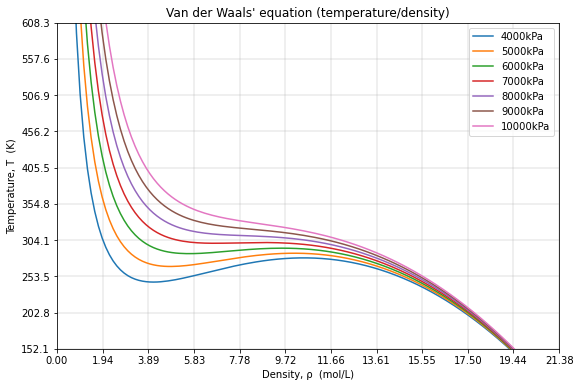

In [13]:
VdW_tvdplot(365.8, 0.04286, 3, 1000)

Now the `VdW_pvtplot`, `VdW_pvdplot` and `VdW_tvdplot` functions give us three, two dimensional, views of the Van der Waals' equation surface. Our next task will be to create a three dimensional surface of the Van der Waals' equation.
</br> </br> </br>
We can start to see the different perspectives of the surface if we increase the `range_ud` and decrease the `z_step` of each function:

Critical Pressure: 7375.2 kPa
Critical Temperature: 304.1 K




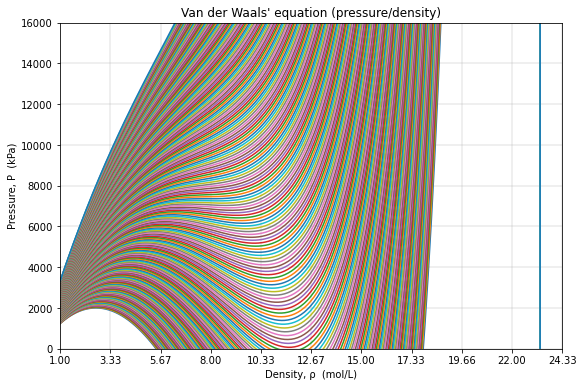

In [14]:
VdW_pvdplot(365.8, 0.04286, 120, 1, legend_toggle=False)

Critical Pressure: 7375.2 kPa
Critical Temperature: 304.1 K




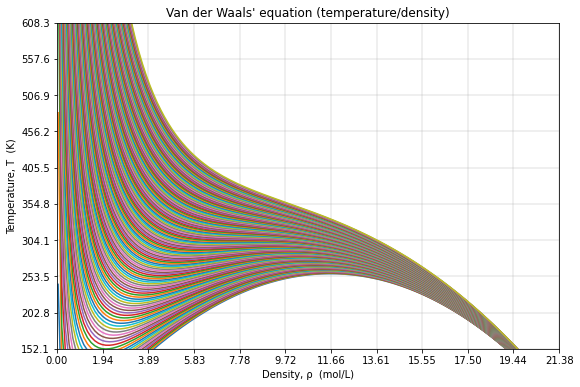

In [15]:
VdW_tvdplot(365.8, 0.04286, 80, 100, legend_toggle=False)

Critical Pressure: 7375.2 kPa
Critical Temperature: 304.1 K




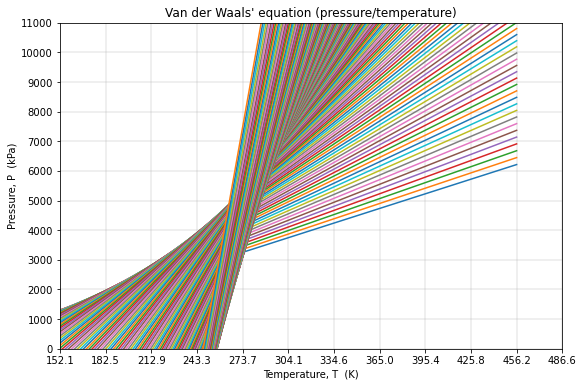

In [16]:
VdW_pvtplot(365.8, 0.04286, 80, 0.075, legend_toggle=False)

Unfortunately, it is almost impossible to imagine this as a three dimensional surface, so a three dimensional model will be required. Note that spots of darker shade are points of higher gradient, and spots of a lighter shade (or if more background is visibile) have a smoother shape with a less steep gradient.